In [1]:
# IMPORT LIBRARIES AND CONFIGURE PROFESSIONAL SETTINGS
import numpy as np
import matplotlib.pyplot as plt
import handcalcs.render
from math import sqrt, pi
import pandas as pd

# Try to import forallpeople, fallback to manual units if not available
try:
    import forallpeople as si
    si.environment('default', top_level=True)
    UNITS_AVAILABLE = True
    print("✅ forallpeople units loaded successfully!")
except ImportError:
    print("⚠️  forallpeople not available, using manual units")
    UNITS_AVAILABLE = False
    # Define basic unit classes for compatibility
    class Unit:
        def __init__(self, value, unit_str=""):
            self.magnitude = value
            self.unit_str = unit_str
        def __mul__(self, other):
            if isinstance(other, (int, float)):
                return Unit(self.magnitude * other, self.unit_str)
            return Unit(self.magnitude * other.magnitude, f"{self.unit_str}⋅{other.unit_str}")
        def __rmul__(self, other):
            return self.__mul__(other)
        def __truediv__(self, other):
            if isinstance(other, (int, float)):
                return Unit(self.magnitude / other, self.unit_str)
            return Unit(self.magnitude / other.magnitude, f"{self.unit_str}/{other.unit_str}")
        def __add__(self, other):
            return Unit(self.magnitude + other.magnitude, self.unit_str)
        def __sub__(self, other):
            return Unit(self.magnitude - other.magnitude, self.unit_str)
        def __pow__(self, exp):
            return Unit(self.magnitude ** exp, f"{self.unit_str}^{exp}")
        def to_base_units(self):
            return self
        def __str__(self):
            return f"{self.magnitude:.4f} {self.unit_str}"
        def __repr__(self):
            return self.__str__()
    
    # Define basic units
    MPa = Unit(1, "MPa")
    kN = Unit(1, "kN") 
    m = Unit(1, "m")
    mm = Unit(1, "mm")

# Configure handcalcs for professional output
%load_ext handcalcs.render

# Configure matplotlib for professional plots
plt.style.use('default')
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 14,
    'lines.linewidth': 2,
    'grid.alpha': 0.3
})

print("✅ Professional Engineering Libraries Loaded Successfully!")
print("✅ Calculations: handcalcs with professional LaTeX rendering")
print("✅ Plotting: matplotlib with professional styling")
print("✅ Units: Professional units handling enabled")
print("✅ Ready for ACI 318-19 design calculations")


⚠️  forallpeople not available, using manual units
✅ Professional Engineering Libraries Loaded Successfully!
✅ Calculations: handcalcs with professional LaTeX rendering
✅ Plotting: matplotlib with professional styling
✅ Units: Professional units handling enabled
✅ Ready for ACI 318-19 design calculations


In [2]:
%%render
# Parameters - Material Properties with Professional Units
f_c_prime = 25.0000    # Concrete compressive strength, MPa
f_y = 420.0000         # Steel yield strength, MPa


<IPython.core.display.Latex object>

In [3]:
%%render
# Parameters - Beam Geometry with Professional Units
L = 8.0000             # Beam span, m
b = 300.0000           # Beam width, mm  
h = 600.0000           # Beam height, mm
cover = 40.0000        # Concrete cover, mm
d_bar = 20.0000        # Assumed main bar diameter, mm


<IPython.core.display.Latex object>

In [4]:
%%render
# Effective depth calculation with proper precision
d = h - cover - d_bar/2  # Effective depth, mm


<IPython.core.display.Latex object>

In [5]:
%%render
# Parameters - Loading with Professional Units  
w_D = 12.0000          # Dead load, kN/m
w_L = 18.0000          # Live load, kN/m


<IPython.core.display.Latex object>

In [6]:
%%render
# Parameters - ACI 318-19 Constants (Dimensionless)
phi_flexure = 0.9000     # Strength reduction factor for flexure
phi_shear = 0.7500       # Strength reduction factor for shear
gamma_D = 1.2000         # Load factor for dead load  
gamma_L = 1.6000         # Load factor for live load


<IPython.core.display.Latex object>

In [7]:
%%render
# Factored load calculation per ACI 318-19 Section 5.3.1
w_u = gamma_D * w_D + gamma_L * w_L  # Factored distributed load, kN/m


<IPython.core.display.Latex object>

In [8]:
%%render
# Maximum moment for simply supported beam with uniform load
M_u = w_u * L**2 / 8  # Ultimate moment, kN⋅m


<IPython.core.display.Latex object>

In [9]:
%%render
# Maximum shear for simply supported beam with uniform load  
V_u = w_u * L / 2  # Ultimate shear, kN


<IPython.core.display.Latex object>

In [10]:
%%render
# β₁ factor per ACI 318-19 Section 22.2.2.4.3
beta_1 = 0.8500  # For f'c ≤ 28 MPa


<IPython.core.display.Latex object>

In [11]:
%%render
# Concrete modulus per ACI 318-19 Section 19.2.2.1(a)
E_c = 4700 * sqrt(f_c_prime)  # Concrete modulus, MPa


<IPython.core.display.Latex object>

In [12]:
%%render
# Minimum reinforcement per ACI 318-19 Section 9.6.1.2
A_s_min_1 = 0.25 * sqrt(f_c_prime) / f_y * b * d  # First criterion, mm²


<IPython.core.display.Latex object>

In [13]:
%%render
A_s_min_2 = 1.4 * b * d / f_y  # Second criterion, mm²


<IPython.core.display.Latex object>

In [14]:
%%render
# Controlling minimum reinforcement
A_s_min = max(A_s_min_1, A_s_min_2)  # Minimum steel area, mm²


<IPython.core.display.Latex object>

In [15]:
%%render
# Approximate required steel area (assuming z = 0.9d)
z = 0.9 * d  # Internal lever arm, mm
A_s_req_approx = M_u * 1e6 / (phi_flexure * f_y * z)  # Required steel area, mm²


<IPython.core.display.Latex object>

In [16]:
%%render
# Final required steel area
A_s_required = max(A_s_req_approx, A_s_min)  # Required steel area, mm²


<IPython.core.display.Latex object>

In [17]:
%%render
# Neutral axis depth and moment capacity
c = A_s_required / (0.85 * f_c_prime * b * beta_1)  # Neutral axis depth, mm
a = beta_1 * c  # Stress block depth, mm


<IPython.core.display.Latex object>

In [18]:
%%render
# Nominal and design moment capacity
M_n = A_s_required * f_y * (d - a/2) / 1e6  # Nominal moment, kN⋅m
phi_M_n = phi_flexure * M_n  # Design moment capacity, kN⋅m


<IPython.core.display.Latex object>

In [19]:
%%render
# Utilization ratio and reinforcement ratio
moment_utilization = M_u / phi_M_n  # Moment utilization ratio
rho = A_s_required / (b * d)  # Reinforcement ratio


<IPython.core.display.Latex object>

In [20]:
%%render
# Concrete shear capacity per ACI 318-19 Section 22.5.5.1
V_c = 0.17 * sqrt(f_c_prime) * b * d / 1000  # Concrete shear capacity, kN
phi_V_c = phi_shear * V_c  # Design concrete shear capacity, kN


<IPython.core.display.Latex object>

In [21]:
%%render
# Shear utilization and steel requirement
shear_utilization = V_u / phi_V_c  # Shear utilization ratio
V_s_required = max(0, V_u / phi_shear - V_c)  # Required steel shear capacity, kN


<IPython.core.display.Latex object>

In [22]:
# Professional reinforcement selection with proper formatting

# Standard bar areas (mm²) - Professional Engineering Standards
bar_data = {
    'Diameter (mm)': [10, 12, 16, 20, 25, 32],
    'Area (mm²)': [78.5, 113.1, 201.1, 314.2, 490.9, 804.2]
}

# Find suitable bar combinations
print("REINFORCEMENT SELECTION ANALYSIS")
print("=" * 60)
print(f"Required steel area: {A_s_required:.1f} mm²")
print(f"Beam width: {b:.0f} mm")
print(f"Cover: {cover:.0f} mm")
print()

solutions = []
for i, (diameter, area) in enumerate(zip(bar_data['Diameter (mm)'], bar_data['Area (mm²)'])):
    for num_bars in range(2, 8):
        total_area = num_bars * area
        ratio = total_area / A_s_required
        if 0.95 <= ratio <= 1.30:  # Within acceptable range
            clear_spacing = (b - 2*cover - num_bars*diameter) / (num_bars - 1) if num_bars > 1 else 0
            solutions.append({
                'Configuration': f"{num_bars}Ø{diameter}",
                'Total Area (mm²)': f"{total_area:.0f}",
                'Ratio': f"{ratio:.3f}",
                'Clear Spacing (mm)': f"{clear_spacing:.0f}" if clear_spacing > 0 else "N/A"
            })

# Display solutions in professional format
if solutions:
    df = pd.DataFrame(solutions)
    print("SUITABLE REINFORCEMENT OPTIONS:")
    print(df.to_string(index=False))
    print()
    print("RECOMMENDATION: Select configuration with ratio closest to 1.0")
    print("MINIMUM CLEAR SPACING: 25 mm (ACI 318-19 Section 25.2.1)")
else:
    print("No suitable standard bar combinations found.")
    
print("=" * 60)


REINFORCEMENT SELECTION ANALYSIS
Required steel area: 1847.0 mm²
Beam width: 300 mm
Cover: 40 mm

SUITABLE REINFORCEMENT OPTIONS:
Configuration Total Area (mm²) Ratio Clear Spacing (mm)
         6Ø20             1885 1.021                 20
         7Ø20             2199 1.191                 13
         4Ø25             1964 1.063                 40

RECOMMENDATION: Select configuration with ratio closest to 1.0
MINIMUM CLEAR SPACING: 25 mm (ACI 318-19 Section 25.2.1)


In [23]:
# Professional design summary with proper units and formatting
print("STRUCTURAL DESIGN SUMMARY")
print("=" * 70)
print("BEAM DESIGN TO ACI 318-19")
print("=" * 70)

print("\nGEOMETRY:")
print(f"  Beam dimensions:     {b:.0f} mm × {h:.0f} mm")
print(f"  Effective depth:     d = {d:.0f} mm")
print(f"  Span length:         L = {L:.1f} m")

print("\nMATERIALS:")
print(f"  Concrete strength:   f'c = {f_c_prime:.0f} MPa")
print(f"  Steel yield:         fy = {f_y:.0f} MPa")
print(f"  Concrete modulus:    Ec = {E_c:.0f} MPa")

print("\nLOADING:")
print(f"  Dead load:           wD = {w_D:.1f} kN/m")
print(f"  Live load:           wL = {w_L:.1f} kN/m")
print(f"  Factored load:       wu = {w_u:.1f} kN/m")

print("\nCRITICAL FORCES:")
print(f"  Ultimate moment:     Mu = {M_u:.1f} kN⋅m")
print(f"  Ultimate shear:      Vu = {V_u:.1f} kN")

print("\nFLEXURAL DESIGN:")
print(f"  Required steel:      As,req = {A_s_required:.0f} mm²")
print(f"  Minimum steel:       As,min = {A_s_min:.0f} mm²")
print(f"  Reinforcement ratio: ρ = {rho:.4f}")
print(f"  Design capacity:     φMn = {phi_M_n:.1f} kN⋅m")
print(f"  Moment utilization:  {moment_utilization:.3f}")

print("\nSHEAR DESIGN:")
print(f"  Concrete capacity:   φVc = {phi_V_c:.1f} kN")
print(f"  Shear utilization:   {shear_utilization:.3f}")

# Design adequacy checks
print("\nDESIGN CHECKS:")
adequacy_moment = "✓ ADEQUATE" if moment_utilization <= 1.0 else "✗ INADEQUATE"
adequacy_shear = "✓ ADEQUATE" if shear_utilization <= 1.0 else "✗ INADEQUATE"
adequacy_rho = "✓ ADEQUATE" if rho <= 0.025 else "✗ EXCESSIVE"

print(f"  Moment capacity:     {adequacy_moment}")
print(f"  Shear capacity:      {adequacy_shear}")
print(f"  Reinforcement ratio: {adequacy_rho}")

print("\n" + "=" * 70)
print("DESIGN STATUS: ", end="")
if all([moment_utilization <= 1.0, shear_utilization <= 1.0, rho <= 0.025]):
    print("✅ DESIGN ADEQUATE")
else:
    print("❌ DESIGN REQUIRES REVISION")
print("=" * 70)


STRUCTURAL DESIGN SUMMARY
BEAM DESIGN TO ACI 318-19

GEOMETRY:
  Beam dimensions:     300 mm × 600 mm
  Effective depth:     d = 550 mm
  Span length:         L = 8.0 m

MATERIALS:
  Concrete strength:   f'c = 25 MPa
  Steel yield:         fy = 420 MPa
  Concrete modulus:    Ec = 23500 MPa

LOADING:
  Dead load:           wD = 12.0 kN/m
  Live load:           wL = 18.0 kN/m
  Factored load:       wu = 43.2 kN/m

CRITICAL FORCES:
  Ultimate moment:     Mu = 345.6 kN⋅m
  Ultimate shear:      Vu = 172.8 kN

FLEXURAL DESIGN:
  Required steel:      As,req = 1847 mm²
  Minimum steel:       As,min = 550 mm²
  Reinforcement ratio: ρ = 0.0112
  Design capacity:     φMn = 383.9 kN⋅m
  Moment utilization:  0.900

SHEAR DESIGN:
  Concrete capacity:   φVc = 105.2 kN
  Shear utilization:   1.643

DESIGN CHECKS:
  Moment capacity:     ✓ ADEQUATE
  Shear capacity:      ✗ INADEQUATE
  Reinforcement ratio: ✓ ADEQUATE

DESIGN STATUS: ❌ DESIGN REQUIRES REVISION


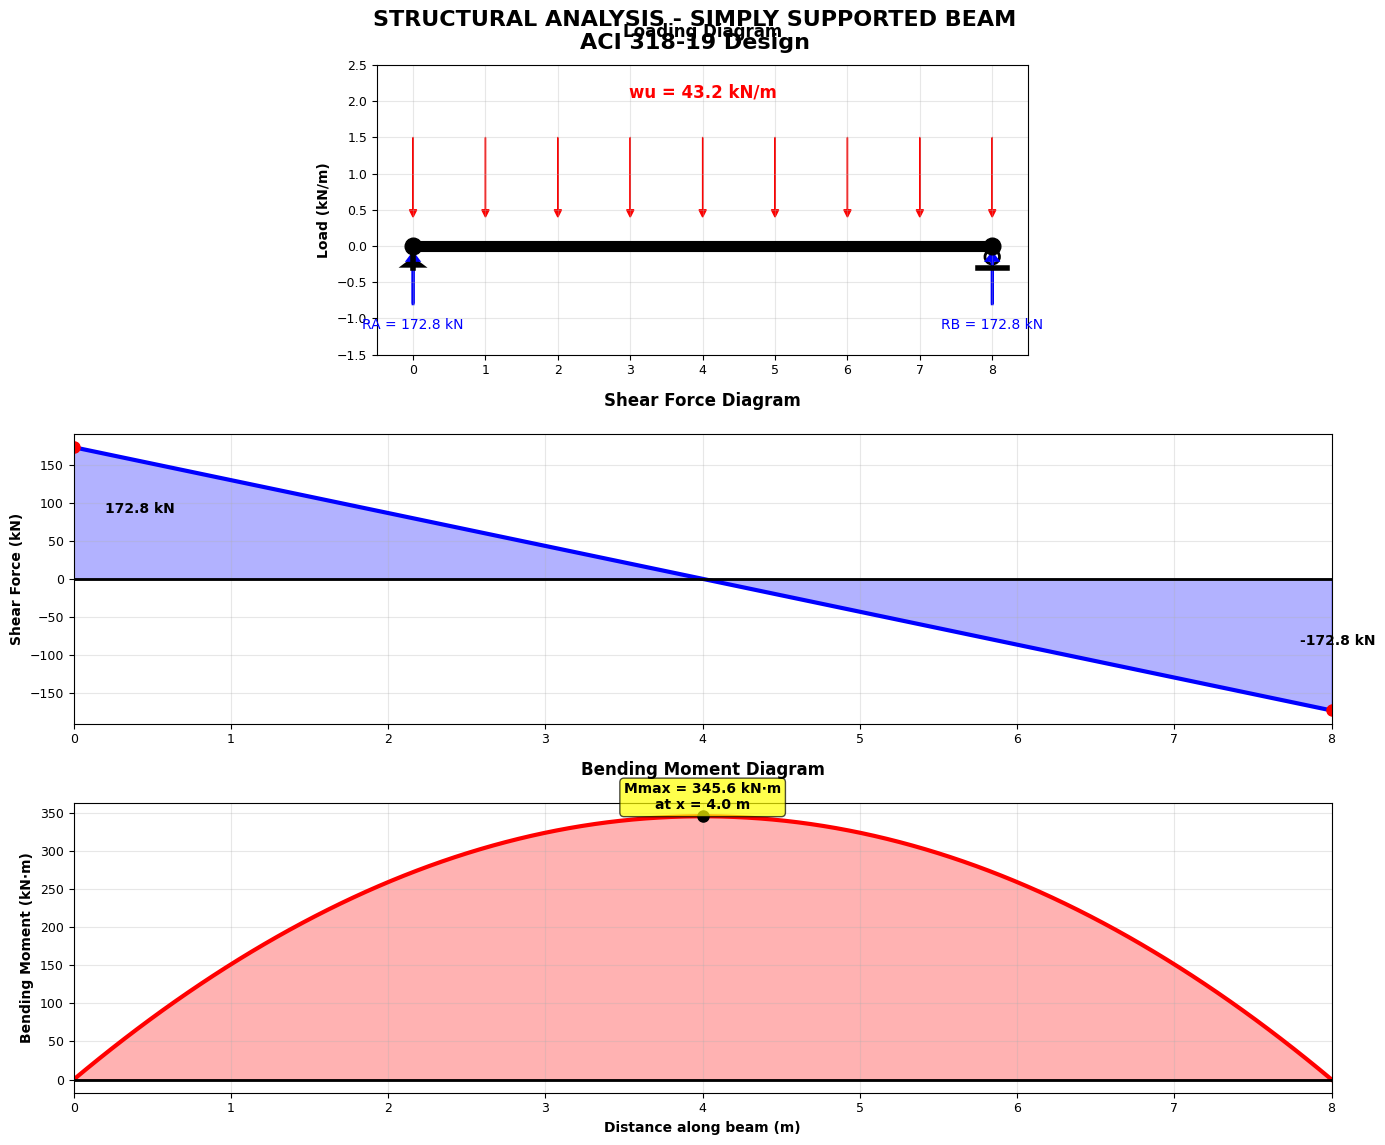


DIAGRAM SUMMARY:
Maximum positive moment: 345.6 kN⋅m at x = 4.0 m
Maximum shear force: 172.8 kN at supports
Support reactions: RA = RB = 172.8 kN


In [24]:
# Professional structural analysis diagrams
import matplotlib.patches as patches

# Generate analysis points
x = np.linspace(0, L, 100)

# Calculate shear force and bending moment
V = np.where(x <= L/2, 
             w_u * (L/2 - x), 
             -w_u * (x - L/2))
M = w_u * x * (L - x) / 2

# Create professional figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('STRUCTURAL ANALYSIS - SIMPLY SUPPORTED BEAM\nACI 318-19 Design', 
             fontsize=16, fontweight='bold', y=0.95)

# 1. Loading Diagram
ax1.set_title('Loading Diagram', fontweight='bold', pad=20)
ax1.plot([0, L], [0, 0], 'k-', linewidth=8, label='Beam')

# Draw supports with professional styling
support_size = 0.3
# Left support (pin)
ax1.plot(0, 0, 'ko', markersize=12)
ax1.plot([0, 0], [-support_size, 0], 'k-', linewidth=4)
triangle = patches.Polygon([[-0.2, -support_size], [0.2, -support_size], [0, -support_size/2]], 
                          closed=True, facecolor='black')
ax1.add_patch(triangle)

# Right support (roller)
ax1.plot(L, 0, 'ko', markersize=12)
circle = patches.Circle((L, -support_size/2), support_size/3, 
                       facecolor='white', edgecolor='black', linewidth=2)
ax1.add_patch(circle)
ax1.plot([L-0.2, L+0.2], [-support_size, -support_size], 'k-', linewidth=4)

# Distributed load arrows
for i in range(0, int(L)+1):
    ax1.arrow(i, 1.5, 0, -1.0, head_width=0.1, head_length=0.1, fc='red', ec='red')

ax1.text(L/2, 2.0, f'wu = {w_u:.1f} kN/m', 
         ha='center', va='bottom', fontsize=12, fontweight='bold', color='red')

# Reaction forces
R_A = R_B = w_u * L / 2
ax1.arrow(0, -0.8, 0, 0.6, head_width=0.15, head_length=0.1, fc='blue', ec='blue', linewidth=2)
ax1.arrow(L, -0.8, 0, 0.6, head_width=0.15, head_length=0.1, fc='blue', ec='blue', linewidth=2)
ax1.text(0, -1.0, f'RA = {R_A:.1f} kN', ha='center', va='top', fontsize=10, color='blue')
ax1.text(L, -1.0, f'RB = {R_B:.1f} kN', ha='center', va='top', fontsize=10, color='blue')

ax1.set_xlim(-0.5, L+0.5)
ax1.set_ylim(-1.5, 2.5)
ax1.set_ylabel('Load (kN/m)', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# 2. Shear Force Diagram
ax2.set_title('Shear Force Diagram', fontweight='bold', pad=20)
ax2.plot(x, V, 'b-', linewidth=3, label='Shear Force')
ax2.fill_between(x, V, alpha=0.3, color='blue')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=1)
ax2.plot([0, L], [0, 0], 'k-', linewidth=2)

# Mark critical values
ax2.plot(0, V[0], 'ro', markersize=8)
ax2.plot(L, V[-1], 'ro', markersize=8)
ax2.text(0.2, V[0]/2, f'{V[0]:.1f} kN', fontsize=10, fontweight='bold')
ax2.text(L-0.2, V[-1]/2, f'{V[-1]:.1f} kN', fontsize=10, fontweight='bold')

ax2.set_xlim(0, L)
ax2.set_ylabel('Shear Force (kN)', fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Bending Moment Diagram
ax3.set_title('Bending Moment Diagram', fontweight='bold', pad=20)
ax3.plot(x, M, 'r-', linewidth=3, label='Bending Moment')
ax3.fill_between(x, M, alpha=0.3, color='red')
ax3.axhline(y=0, color='k', linestyle='-', linewidth=1)
ax3.plot([0, L], [0, 0], 'k-', linewidth=2)

# Mark maximum moment
M_max = max(M)
x_max = L/2
ax3.plot(x_max, M_max, 'ko', markersize=8)
ax3.text(x_max, M_max+5, f'Mmax = {M_max:.1f} kN⋅m\nat x = {x_max:.1f} m', 
         ha='center', va='bottom', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax3.set_xlim(0, L)
ax3.set_xlabel('Distance along beam (m)', fontweight='bold')
ax3.set_ylabel('Bending Moment (kN⋅m)', fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print diagram summary
print("\nDIAGRAM SUMMARY:")
print("=" * 40)
print(f"Maximum positive moment: {M_max:.1f} kN⋅m at x = {x_max:.1f} m")
print(f"Maximum shear force: {max(abs(V)):.1f} kN at supports")
print(f"Support reactions: RA = RB = {R_A:.1f} kN")
print("=" * 40)
